<a href="https://colab.research.google.com/github/uavinash15/DataScience-/blob/main/Notebooks/Advanced%20Machine%20Learning/Advanced%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6: Advanced Machine Learning


### 6.2.1 Developing a Gradient Descent Algorithm for Linear Regression Model

#### 6.2.1.1 Loading the dataset

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

sales_df = pd.read_csv( 'Advertising.csv' )
# Pring first few records
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### 6.2.1.2 Set X and Y Variable

In [2]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
Y = sales_df['Sales']

In [3]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [4]:
X.shape

(200, 3)

In [5]:
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [6]:
Y.shape

(200,)

#### 6.2.1.3 Standardize X & Y

In [7]:
Y = np.array( (Y - Y.mean() ) / Y.std() )
X = X.apply( lambda rec: ( rec - rec.mean() ) / rec.std(),
            axis = 0 )

In [8]:
Y

array([ 1.54816813, -0.69430382, -0.90513451,  0.85817677, -0.21514314,
       -1.30762948, -0.42597384, -0.15764386, -1.76762372, -0.65597096,
       -1.0392995 ,  0.64734607, -0.92430094, -0.8284688 ,  0.9540089 ,
        1.60566742, -0.29180885,  1.98899595, -0.52180597,  0.11068612,
        0.76234463, -0.29180885, -1.61429231,  0.28318396, -0.8284688 ,
       -0.38764098,  0.18735182,  0.35984967,  0.93484247, -0.67513739,
        1.41400315, -0.40680741, -0.84763523,  0.64734607, -0.86680166,
       -0.23430957,  2.18066022,  0.12985254, -0.7518031 ,  1.43316957,
        0.49401465,  0.58984679,  1.27983816, -0.21514314, -1.05846593,
        0.1681854 , -0.65597096,  1.75899883,  0.14901897, -0.8284688 ,
       -0.50263955, -0.63680453,  1.64400027,  1.37567029,  1.18400602,
        1.85483097, -1.63345873, -0.15764386,  1.87399739,  0.83901034,
       -1.13513163,  1.9506631 ,  0.32151681, -0.00431245,  0.76234463,
       -0.90513451, -0.86680166, -0.11931101,  0.93484247,  1.58

In [9]:
Y.shape

(200,)

In [10]:
X

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


#### 6.2.1.4 Implementing the Gradient Descent Algorithm

**Method 1: Random Initialization the bias and weights**

In [11]:
import random

#dim - is the number of weights to be initialized besides the bias
def initialize( dim ):
    # For reproducible results, the seed it set to 42.
    np.random.seed(seed=42)
    random.seed(42)
    #Initialize the bias
    b = random.random()
    #Initialize the weights.
    w = np.random.rand( dim )

    return b, w

In [12]:
b, w = initialize( 3 )
print( "Bias: ", b, " Weights: ", w )

Bias:  0.6394267984578837  Weights:  [0.37454012 0.95071431 0.73199394]


**Method 2: Predict Y values from the bias and weights**

In [13]:
X*w

,TV,Radio,Newspaper
0,0.362339,0.930812,1.298918
1,-0.447343,1.026864,0.488901
2,-0.566439,1.449495,1.302279
3,0.019446,1.154934,0.939284
4,0.147267,-0.798131,0.935923
...,...,...,...
195,-0.474827,-1.252779,-0.563113
196,-0.230526,-1.175937,-0.754694
197,0.130690,-0.894184,-0.811832
198,0.595734,1.199758,1.198086


In [14]:
print(0.967425*0.37454012)

0.362339475591


In [15]:
np.matmul( X, w )

,0
0,2.592069
1,1.068422
2,2.185334
3,2.113663
4,0.285059
...,...
195,-2.290719
196,-2.161157
197,-1.575326
198,2.993578


In [16]:
# Inputs:
# b - bias
# w - weights
# X - the input matrix

def predict_Y( b, w, X ):
    return b + np.matmul( X, w )

In [17]:
b, w = initialize( 3 )
Y_hat = predict_Y( b, w, X)
Y_hat[0:10]

,0
0,3.231496
1,1.707849
2,2.824761
3,2.753090
4,0.924486
5,3.171365
6,0.622344
7,-0.349354
8,-2.313095
9,-0.768030


In [18]:
Y_hat.shape

(200,)

In [19]:
print(0.6394267984578837+0.362339+0.930812+1.298918)

3.2314957984578836


**Method 3: Calculate the cost function: MSE**

In [20]:
Y_resid = Y - Y_hat
Y_resid.head()

,0
0,-1.683327
1,-2.402153
2,-3.729895
3,-1.894913
4,-1.139629


In [21]:
Y_resid.shape

(200,)

In [22]:
Y_resid.T

,0
0,-1.683327
1,-2.402153
2,-3.729895
3,-1.894913
4,-1.139629
...,...
195,0.420328
196,0.693262
197,0.701589
198,-1.433178


In [23]:
Y_resid.T.shape

(200,)

In [24]:
np.sum( np.matmul( Y_resid.T, Y_resid ) ) / len( Y_resid )

np.float64(1.5303100198505897)

In [25]:
import math

# Inputs
# Y - Actual values of y
# Y_hat - predicted value of y
def get_cost( Y, Y_hat ):
    # Calculating the residuals from taking difference between actual and predicted values
    Y_resid = Y - Y_hat
    # Matrix multiplication with self will give the square values
    # Then takin the sum and dividing by number of examples to calculate mean
    return np.sum( np.matmul( Y_resid.T, Y_resid ) ) / len( Y_resid )

In [26]:
b, w = initialize( 3 )
Y_hat = predict_Y( b, w, X)
get_cost( Y, Y_hat )

np.float64(1.5303100198505897)

#### Method 4: Update the bias and weights

In [27]:
def update_beta( x, y, y_hat, b_0, w_0, learning_rate ):

    #gradient of bias
    db = (np.sum( y_hat - y ) * 2) / len(y)
    #gradient of weights
    dw = (np.dot( ( y_hat - y ), x ) * 2 ) / len(y)
    #update bias
    b_1 = b_0 - learning_rate * db
    #update beta
    w_1 = w_0 - learning_rate * dw

    #return the new bias and beta values
    return b_1, w_1

In [28]:
b, w = initialize( 3 )
print( "After Initialization - Bias: ", b, " Weights: ", w )
Y_hat = predict_Y( b, w, X)
b, w = update_beta( X, Y, Y_hat, b, w, 0.01 )
print( "After first update - Bias: ", b, " Weights: ", w )

After Initialization - Bias:  0.6394267984578837  Weights:  [0.37454012 0.95071431 0.73199394]
After first update - Bias:  0.6266382624887261  Weights:  [0.38079093 0.9376953  0.71484883]


#### 6.2.1.5 Finding the optimal bias and weights

In [29]:
initialize( X.shape[1] )

(0.6394267984578837, array([0.37454012, 0.95071431, 0.73199394]))

In [30]:
def run_gradient_descent( X,
                          Y,
                          alpha = 0.01,
                          num_iterations = 100):

    # Intialize the bias and weights
    b, w = initialize( X.shape[1] )

    iter_num = 0
    # gd_iterations_df keeps track of the cost every 10 iterations
    gd_iterations_df = pd.DataFrame(columns = ['iteration', 'cost'])
    result_idx = 0

    # Run the iterations in loop
    for each_iter in range(num_iterations):
        # Calcuated predicted value of y
        Y_hat = predict_Y( b, w, X )
        # Calculate the cost
        this_cost = get_cost( Y, Y_hat )
        # Save the previous bias and weights
        prev_b = b
        prev_w = w
        # Update and calculate the new values of bias and weights
        b, w = update_beta( X, Y, Y_hat, prev_b, prev_w, alpha)

        # For every 10 iterations, store the cost i.e. MSE
        if( iter_num % 10 == 0 ):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1

        iter_num += 1

    print( "Final estimate of b and w: ", b, w )

    #return the final bias, weights and the cost at the end

    return gd_iterations_df, b, w

In [31]:
gd_iterations_df, b, w = run_gradient_descent( X, Y, alpha = 0.001, num_iterations = 200 )

Final estimate of b and w:  0.4284489581739146 [0.48270238 0.75265969 0.46109174]


In [32]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.530310
1,10.0,1.465201
2,20.0,1.403145
3,30.0,1.343996
4,40.0,1.287615
5,50.0,1.233868
6,60.0,1.182630
7,70.0,1.133780
8,80.0,1.087203
9,90.0,1.042793


#### 6.2.1.6 Plotting the cost function against the iterations

In [33]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 0, 'Cost or MSE')

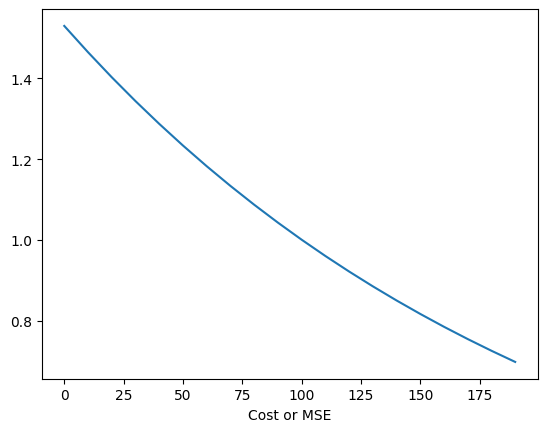

In [34]:
plt.plot( gd_iterations_df['iteration'], gd_iterations_df['cost'] );
plt.xlabel("Number of iterations")
plt.xlabel("Cost or MSE")

In [35]:
print( "Final estimates of b and w: ", b, w )

Final estimates of b and w:  0.4284489581739146 [0.48270238 0.75265969 0.46109174]


In [36]:
alpha_df_1, b, w = run_gradient_descent( X, Y, alpha = 0.01, num_iterations = 2000 )

Final estimate of b and w:  -5.568727901296403e-17 [ 0.75306591  0.53648155 -0.00433069]


What happens if we change the learning parameter and use smaller value e.g. 0.001.

In [37]:
alpha_df_2, b, w = run_gradient_descent( X, Y, alpha = 0.001, num_iterations = 2000 )

Final estimate of b and w:  0.01166469555693021 [0.74315125 0.52779959 0.01171703]


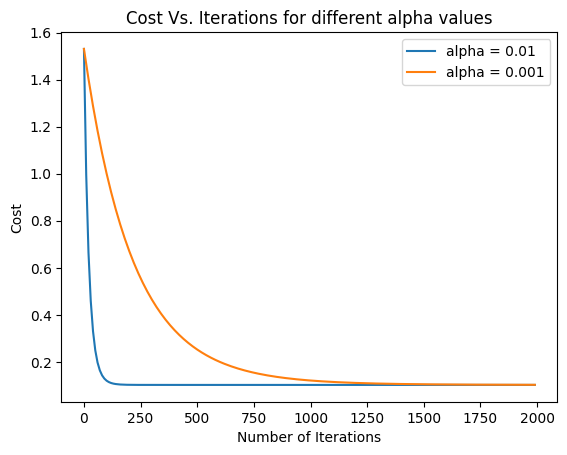

In [38]:
plt.plot( alpha_df_1['iteration'], alpha_df_1['cost'], label = "alpha = 0.01" );
plt.plot( alpha_df_2['iteration'], alpha_df_2['cost'], label = "alpha = 0.001"  );
plt.legend()
plt.ylabel('Cost');
plt.xlabel('Number of Iterations');
plt.title('Cost Vs. Iterations for different alpha values');

## 6.3 *scikit-learn* Library for Machine Learning

### 6.3.1 Steps for Building Machine Learning Models

#### 6.3.1.1  Splitting dataset into train and test datasets

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                          sales_df[["TV", "Radio", "Newspaper"]],
                                          sales_df.Sales,
                                          test_size=0.3,
                                          random_state = 42 ) # Seed value of 42 for reproducibility

In [40]:
len( X_train )

140

In [41]:
len( X_test )

60

In [42]:
X_train.shape

(140, 3)

In [43]:
X_test.shape

(60, 3)

In [44]:
y_train.shape

(140,)

In [45]:
y_test.shape

(60,)

#### 6.3.1.2  Building Linear Regression model with train dataset

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
## Initiliazing the model
linreg = LinearRegression()
# Fitting training data to the model
linreg.fit( X_train, y_train )

LinearRegression()

In [48]:
linreg.intercept_

np.float64(2.7089490925159065)

In [49]:
linreg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [50]:
list( zip( ["TV", "Radio", "Newspaper"], list( linreg.coef_ ) ) )

[('TV', np.float64(0.04405928095746522)),
 ('Radio', np.float64(0.19928749689893954)),
 ('Newspaper', np.float64(0.006882452222275487))]

#### 6.3.1.3 Making prediction on test set

In [51]:
# Predicting the y value from the test set
y_pred = linreg.predict( X_test )

In [52]:
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [53]:
y_pred.shape

(60,)

In [54]:
# Creating a DataFrame with three columns named actual, predicted and residuals to store
# the respective values
test_pred_df = pd.DataFrame( { 'actual': y_test,
                            'predicted': np.round( y_pred, 2),
                            'residuals': y_test - y_pred } )
# Randomly showing the 10 observations from the DataFrame
test_pred_df.sample(10)

,actual,predicted,residuals
126,6.6,11.15,-4.553147
170,8.4,7.35,1.049715
95,16.9,16.57,0.334604
195,7.6,5.22,2.375645
115,12.6,13.36,-0.755569
38,10.1,10.17,-0.070454
56,5.5,8.92,-3.415494
165,11.9,14.30,-2.402060
173,11.7,11.63,0.068431
9,10.6,12.18,-1.576049


#### 6.3.1.4 Measuring Accuracy

In [55]:
## Importing metrics from sklearn
from sklearn import metrics

##### R-Squared Value

In [56]:
## y_train contain the actual value and the predicted value is returned from
# predict() method after passing the X values of the training data.
r2 = metrics.r2_score( y_train, linreg.predict(X_train) )
print("R Sqaured: ", r2)

R Sqaured:  0.9055159502227753


##### RMSE

In [57]:
# y_pred contains predicted value of test data
mse = metrics.mean_squared_error( y_test, y_pred )

In [58]:
# Taking square root of MSE and then round off to two decimal values
rmse = round( np.sqrt(mse), 2 )
print("RMSE: ", rmse)

RMSE:  1.95


### 6.3.2 Bias-Variance Trade-off

In [59]:
# Reading the file curve.csv and printing first few examples
curve = pd.read_csv( "curve.csv" )
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


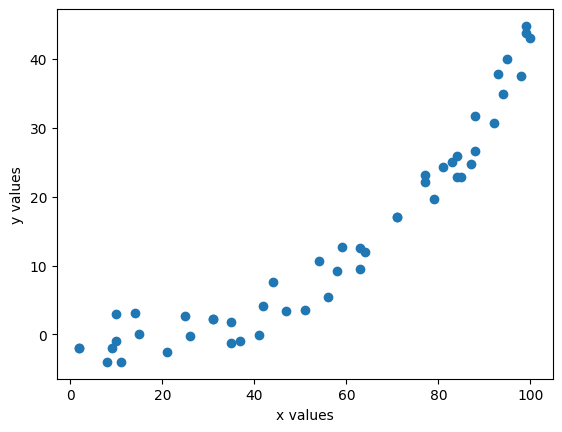

In [60]:
plt.scatter( curve.x, curve.y );
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [61]:
# Input
# degree - polynomial terms to be used in the model
def fit_poly( degree ):
    # calling numpy method polyfit
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    # draw the regression line after fitting the model
    sn.regplot( x=curve.x, y=curve.y, fit_reg = False )
    # Plot the actual x and y values
    return plt.plot( curve.x, curve.fit, label='fit' )

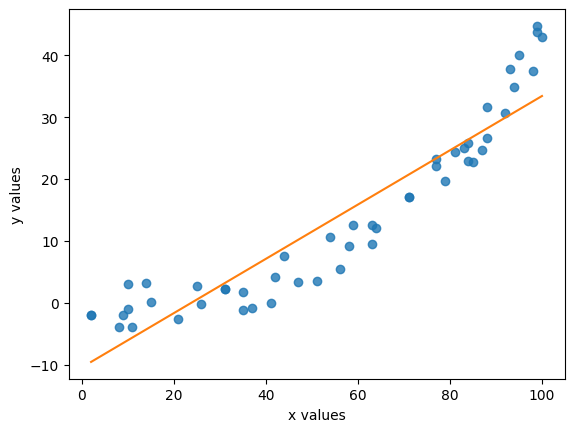

In [62]:
fit_poly( 1 );
## Plotting the model form and the data
plt.xlabel("x values")
plt.ylabel("y values");

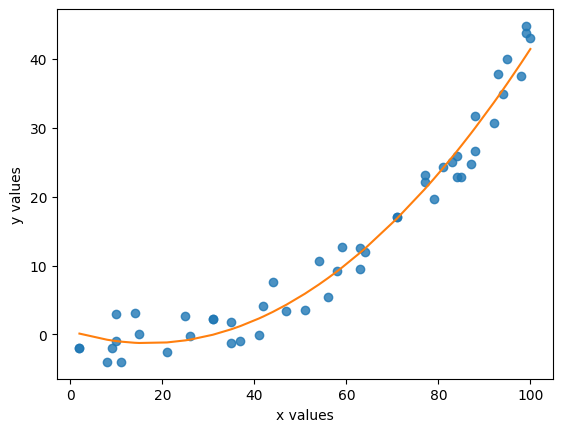

In [63]:
fit_poly( 2 );
plt.xlabel("x values")
plt.ylabel("y values");

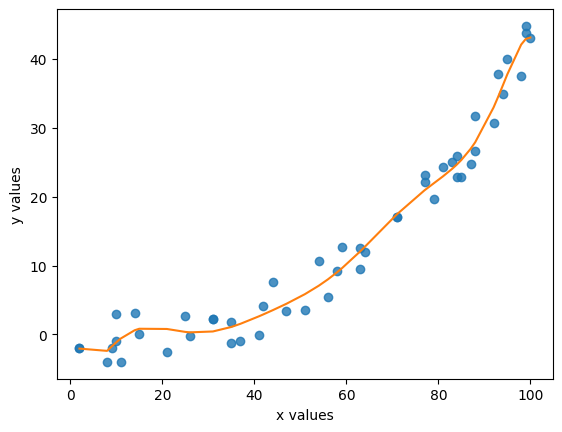

In [64]:
fit_poly( 10 );
plt.xlabel("x values")
plt.ylabel("y values");

In [65]:
# Split the dataset into 60:40 split into training and test set
train_X, test_X, train_y, test_y = train_test_split( curve.x,
                                                    curve.y,
                                                    test_size = 0.40,
                                                    random_state = 100 )

# Define the dataframe store degree and rmse for training and test set
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

# Define a method to return the rmse given actual and predicted values.
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )

# Iterate from degree 1 to 15
for i in range( 1, 15 ):
    # fitting model
    p = np.polyfit( train_X, train_y, deg = i )
    # storing model degree and rmse on train and test set
    rmse_df.loc[i-1] = [ i,
                        get_rmse( train_y, np.polyval( p, train_X ) ),
                        get_rmse( test_y, np.polyval( p, test_X ) ) ]

In [66]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,5.226638,5.779652
1,2.0,2.394509,2.755286
2,3.0,2.233547,2.560184
3,4.0,2.231998,2.549205
4,5.0,2.197528,2.428728
5,6.0,2.062201,2.703880
6,7.0,2.039408,2.909237
7,8.0,1.995852,3.270892
8,9.0,1.979322,3.120420
9,10.0,1.976326,3.115875


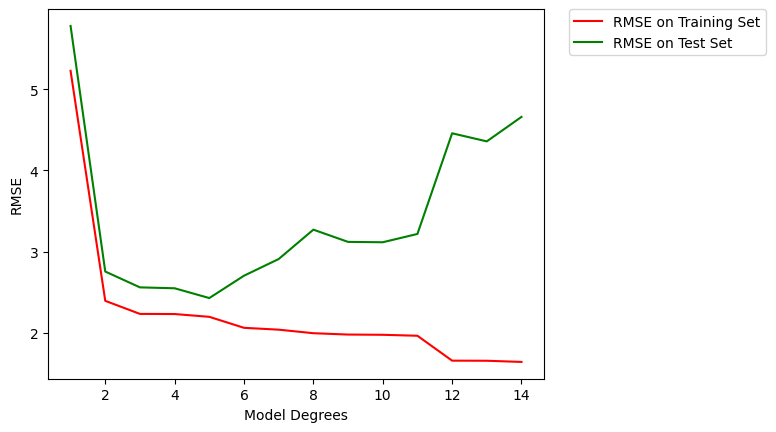

In [67]:
# plotting the rmse for training set in red color
plt.plot( rmse_df.degree,
         rmse_df.rmse_train,
         label='RMSE on Training Set',
         color = 'r' )

# plotting the rmse for test set in green color
plt.plot( rmse_df.degree,
         rmse_df.rmse_test,
         label='RMSE on Test Set',
         color = 'g' )
# Mention the legend
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.);
plt.xlabel("Model Degrees")
plt.ylabel("RMSE");

## 6.4 Advanced Regression Models

#### 6.4.1.1 Loading IPL Dataset

In [68]:
ipl_auction_df = pd.read_csv( 'IPL IMB381IPL2013.csv' )
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [69]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
              'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B',
              'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S',
              'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS',
              'AVE-BL', 'ECON', 'SR-BL']

In [70]:
# categorical_features is initialized with the categorical variable names.
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
#get_dummies() is invoked to return the dummy features.
ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features],
                                        columns = categorical_features,
                                        drop_first = True )

In [71]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [72]:
X = ipl_auction_encoded_df
Y = ipl_auction_df['SOLD PRICE']

In [73]:
Y.head()

,SOLD PRICE
0,50000
1,50000
2,350000
3,850000
4,800000


In [74]:
X.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,False,False,True,False,False,False,False,False,False,False
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,False,False,False,False,False,False,False,True,False,False
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,False,False,False,False,False,False,False,True,False,False
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,False,False,False,False,False,False,False,True,False,False
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,False,False,False,False,False,False,True,False,False,False


In [75]:
(Y.shape,X.shape)

((130,), (130, 31))

#### 6.4.1.2 Standardize X & Y

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
## Initializing the StandardScaler
X_scaler = StandardScaler()
## Standardize all the feature columns
X_scaled = X_scaler.fit_transform(X)

## Standardizing Y explictly by subtracting mean and
## dividing by standard deviation
Y = (Y - Y.mean()) / Y.std()

In [78]:
X_scaled

array([[-0.65799447, -0.46810776, -0.70304269, ..., -0.7152817 ,
        -0.3188964 , -0.67872981],
       [-0.59300633, -0.3414605 , -0.51892663, ...,  1.39805059,
        -0.3188964 , -0.67872981],
       [-0.48459152, -0.06002214, -0.34742125, ...,  1.39805059,
        -0.3188964 , -0.67872981],
       ...,
       [-0.11895727, -0.40478413,  1.55314973, ..., -0.7152817 ,
        -0.3188964 ,  1.47334032],
       [-0.31969169,  1.5582484 , -0.48165504, ...,  1.39805059,
        -0.3188964 , -0.67872981],
       [-0.57053379, -0.01780639, -0.60692122, ...,  1.39805059,
        -0.3188964 , -0.67872981]])

In [79]:
Y.head()

,SOLD PRICE
0,-1.158345
1,-1.158345
2,-0.420895
3,0.808188
4,0.685280


#### 6.4.1.3 Split the dataset into train and test

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
                                          X_scaled,
                                          Y,
                                          test_size=0.2,
                                          random_state = 42)

In [82]:
(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

((104, 31), (26, 31), (104,), (26,))

#### 6.4.1.4 Build the model

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [85]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

In [86]:
## The dataframe has two columns to store feature name
## and the corresponding coefficient values
columns_coef_df = pd.DataFrame( { 'columns': ipl_auction_encoded_df.columns,
                                  'coef': linreg.coef_ } )
## Sorting the features by coefficient values in descending order
sorted_coef_vals = columns_coef_df.sort_values( 'coef', ascending=False)

In [87]:
sorted_coef_vals

,columns,coef
8,AVE,0.585714
2,ODI-RUNS-S,0.508409
13,AVE-BL,0.264008
10,SIXERS,0.248801
19,COUNTRY_ENG,0.248179
4,ODI-WKTS,0.222038
20,COUNTRY_IND,0.187603
30,CAPTAINCY EXP_1,0.187456
6,RUNS-S,0.172827
12,WKTS,0.164287


#### 6.4.1.5  Plotting the coefficient values

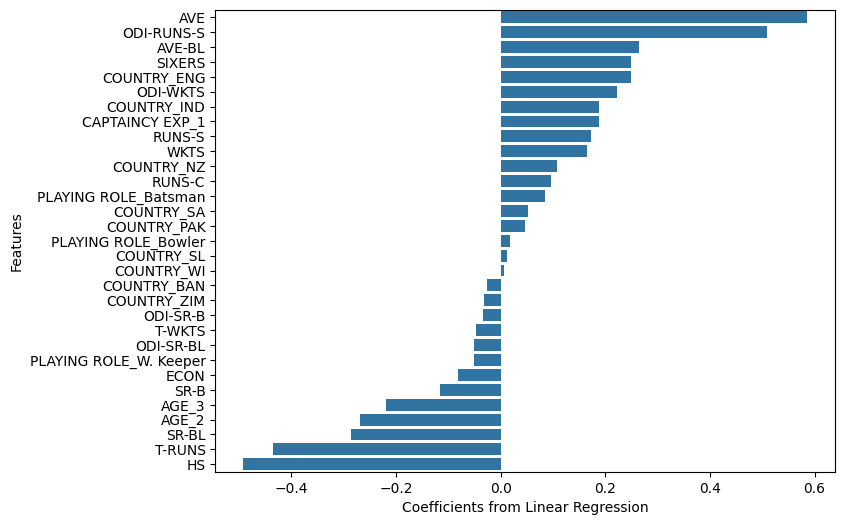

In [88]:
plt.figure( figsize = ( 8, 6 ))
## Creating a bar plot
sn.barplot(x="coef", y="columns",
           data=sorted_coef_vals);
plt.xlabel("Coefficients from Linear Regression")
plt.ylabel("Features")
plt.show()

#### 6.4.1.6 Calculate R-Squared value

In [89]:
from sklearn import metrics

# Takes a model as a parameter
# Prints the RMSE on train and test set
def get_train_test_rmse( model ):
    # Predicting on training dataset
    y_train_pred = model.predict( X_train )
    # Compare the actual y with predicted y in the training dataset
    rmse_train = round(np.sqrt(metrics.mean_squared_error( y_train, y_train_pred )), 3)
    # Predicting on test dataset
    y_test_pred = model.predict( X_test )
    # Compare the actual y with predicted y in the test dataset
    rmse_test = round(np.sqrt(metrics.mean_squared_error( y_test, y_test_pred )), 3)
    print( "train: ", rmse_train, " test:", rmse_test )

In [90]:
get_train_test_rmse( linreg )

train:  0.679  test: 0.749


### 6.4.2 Applying Regularization

### 6.4.2.1 Ridge Regression

In [91]:
# Importing Ridge Regression
from sklearn.linear_model import Ridge

# Applying alpha = 1 and running the algorithms for maximum of 500 iterations
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit( X_train, y_train )

Ridge(alpha=1, max_iter=500)

In [92]:
get_train_test_rmse( ridge )

train:  0.68  test: 0.724


In [93]:
ridge = Ridge(alpha = 2.0, max_iter = 1000)
ridge.fit( X_train, y_train )
get_train_test_rmse( ridge )

train:  0.682  test: 0.706


### 6.4.2.2 Lasso Regression

In [94]:
# Importing Ridge Regression
from sklearn.linear_model import Lasso

# Applying alpha = 1 and running the algorithms for maximum of 500 iterations
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit( X_train, y_train )

Lasso(alpha=0.01, max_iter=500)

In [95]:
get_train_test_rmse( lasso )

train:  0.688  test: 0.698


In [96]:
## Storing the feature names and coefficient values in the DataFrame
lasso_coef_df = pd.DataFrame( { 'columns':
                                 ipl_auction_encoded_df.columns,
                                 'coef':
                                 lasso.coef_ } )

In [97]:
lasso.coef_

array([-0.30124184, -0.        ,  0.41305859, -0.        ,  0.15777894,
       -0.03589268,  0.13182749, -0.35265151,  0.45813533, -0.08314602,
        0.23312868,  0.06985316,  0.11468792, -0.        , -0.03588815,
       -0.00113449, -0.20269476, -0.17781813, -0.02302273,  0.21920531,
        0.19141689,  0.06306074,  0.03001753,  0.01265393, -0.00174897,
       -0.02161736, -0.02594337,  0.05713862,  0.        , -0.04816005,
        0.15880807])

In [98]:
## Filtering out coefficients with zeros
lasso_coef_df[lasso_coef_df.coef == 0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


### 6.4.2.3 Elastic Net Regression

In [99]:
0.01/1.01

0.009900990099009901

In [100]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 1.01, l1_ratio = 0.0099, max_iter = 500)
enet.fit( X_train, y_train )
get_train_test_rmse( enet )

train:  0.794  test: 0.674


## 6.5 More Advanced Algorithms

In [101]:
bank_df = pd.read_csv( 'bank.csv')
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [102]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


### 6.5.1 Dealing with imbalanced datasets

In [103]:
bank_df.subscribed.value_counts()

,count
subscribed,
no,4000
yes,521


In [104]:
## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample

# Separate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']

##Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes,
                                 replace=True,     # sample with replacement
                                 n_samples=2000)

# Combine majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [105]:
new_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 3740
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                6000 non-null   int64 
 1   job                6000 non-null   object
 2   marital            6000 non-null   object
 3   education          6000 non-null   object
 4   default            6000 non-null   object
 5   balance            6000 non-null   int64 
 6   housing-loan       6000 non-null   object
 7   personal-loan      6000 non-null   object
 8   current-campaign   6000 non-null   int64 
 9   previous-campaign  6000 non-null   int64 
 10  subscribed         6000 non-null   object
dtypes: int64(4), object(7)
memory usage: 562.5+ KB


In [106]:
new_bank_df.subscribed.value_counts()

,count
subscribed,
no,4000
yes,2000


In [107]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

In [108]:
# Assigning list of all column names in the DataFrame
X_features = list( new_bank_df.columns )
# Remove the response variable from the list
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [109]:
## get_dummies() will convert all the columns with data type as objects
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True )
X = encoded_bank_df

In [110]:
X.head()

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
1125,38,2998,1,0,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2030,47,150,1,0,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
4356,51,1415,3,0,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
4079,53,-118,3,0,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2387,57,23,8,0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [111]:
X.columns

Index(['age', 'balance', 'current-campaign', 'previous-campaign',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes',
       'housing-loan_yes', 'personal-loan_yes'],
      dtype='object')

In [112]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map( lambda x: int( x == 'yes') )

In [113]:
Y.head()

,subscribed
1125,0
2030,0
4356,0
4079,0
2387,0


In [114]:
Y.shape

(6000,)

In [115]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 42 )

In [116]:
(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

((4200, 23), (1800, 23), (4200,), (1800,))

### 6.5.2 Logistic Regression model

#### 6.5.2.1 Building the model

In [117]:
from sklearn.linear_model import LogisticRegression

## Initializing the model
logit = LogisticRegression()
## Fitting the model with X and Y values of the dataset
logit.fit( train_X, train_y)

LogisticRegression()

In [118]:
pred_y = logit.predict(test_X)

#### 6.5.2.2 Confusion Matrix

In [119]:
## Importing the metrics
from sklearn import metrics

## Defining the matrix to draw the confusion metrix from actual and predicted class labels
def draw_cm( actual, predicted ):
    # Invoking confusion_matrix from metric package. The matrix will oriented as [1,0] i.e.
    # the classes with label 1 will be reprensted the first row and 0 as second row
    cm = metrics.confusion_matrix( actual, predicted, labels=[1,0] )
    ## Confustion will be plotted as heatmap for better visualization
    ## The lables are configured to better interpretation from the plot
    sn.heatmap(cm, annot=True,  fmt='.2f',
               xticklabels = ["Subscribed", "Not Subscribed"]  ,
               yticklabels = ["Subscribed", "Not Subscribed"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

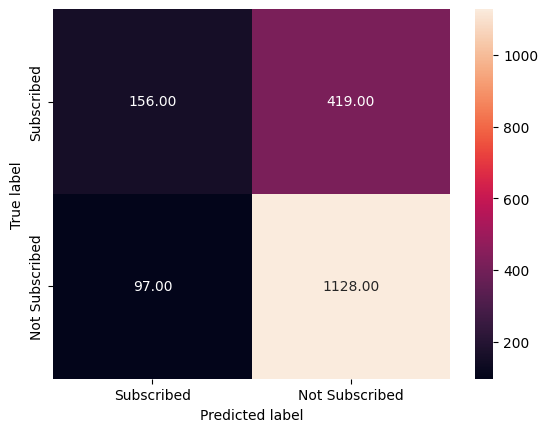

In [120]:
cm = draw_cm( test_y, pred_y )
# After the fix, the function draw_cm directly plots the confusion matrix and does not return the cm object.
# Therefore, the line 'cm' by itself here will cause an error or unexpected behavior.
# Removing 'cm' if it's meant to print the returned object of draw_cm.
# If the intent was to inspect the confusion matrix itself, the draw_cm function needs to be modified to return it.
# For now, I will comment out the 'cm' line as draw_cm handles the plotting internally.

#### 6.5.2.3 Classification Report

In [121]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.73      0.92      0.81      1225
           1       0.62      0.27      0.38       575

    accuracy                           0.71      1800
   macro avg       0.67      0.60      0.60      1800
weighted avg       0.69      0.71      0.67      1800



#### 6.5.2.4 ROC AUC Score

In [122]:
## Predicting the probability values for test cases
predict_proba_df = pd.DataFrame( logit.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.685428,0.314572
1,0.859978,0.140022
2,0.668477,0.331523
3,0.570323,0.429677
4,0.707861,0.292139


In [123]:
## Initializing the DataFrame with actual class lables
test_results_df = pd.DataFrame( { 'actual':  test_y } )
test_results_df = test_results_df.reset_index()
## Assigning the probability values for class label 1
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

In [124]:
test_results_df.head(5)

,index,actual,chd_1
0,1321,0,0.314572
1,3677,0,0.140022
2,1680,1,0.331523
3,821,0,0.429677
4,921,0,0.292139


In [125]:
# Passing actual class labels and the predicted probability values to compute ROC AUC score.
auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1  )
round( float( auc_score ), 2 )

0.69

In [126]:
## The method takes the three following parameters
## model: the classification model
## test_X: X features of the test set
## test_y: actual labels of the test set
## Returns
##  - ROC Auc Score
##  - FPR and TPRs for different threshold values
def draw_roc_curve( model, test_X, test_y ):
    ## Creating and initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame( { 'actual':  test_y } )
    test_results_df = test_results_df.reset_index()

    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )

    ## selecting the probabilities that the test example belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]


    ## Invoke roc_curve() to return the fpr, tpr and threshold values.
    ## threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,
                                           test_results_df.chd_1,
                                           drop_intermediate = False )

    ## Getting the roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1  )

    ## Setting the size of the plot
    plt.figure(figsize=(8, 6))
    ## plotting the actual fpr and tpr values
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    ## plotting th diagnoal line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ## Setting labels and titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return auc_score, fpr, tpr, thresholds

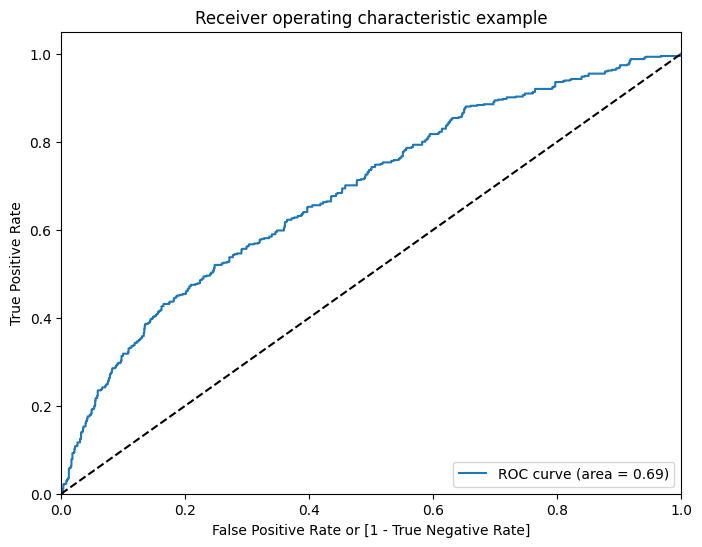

In [127]:
## Invoking draw_roc_curve with the logistic regresson model
_, _, _, _ = draw_roc_curve( logit, test_X, test_y )

### 6.5.3 KNN Algorithm

In [128]:
## Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

## Initializing the classifier
knn_clf = KNeighborsClassifier()
## Fitting the model with the training set
knn_clf.fit( train_X, train_y )

KNeighborsClassifier()

#### 6.5.3.1 KNN Accuracy

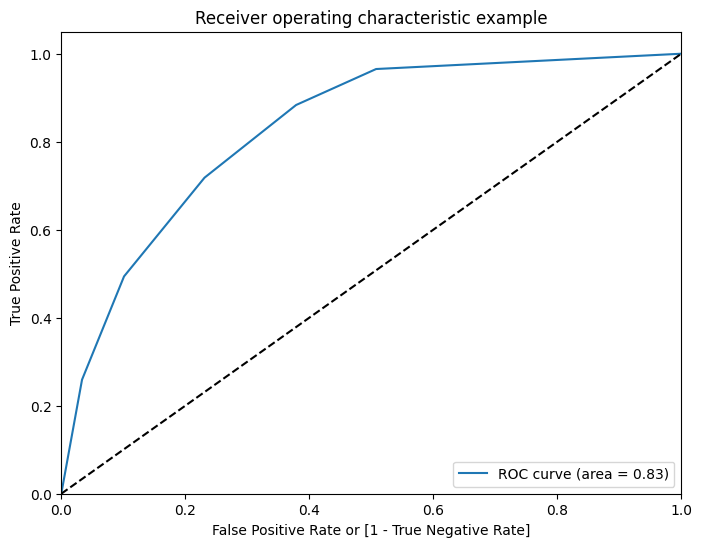

In [129]:
## Invoking draw_roc_curve with the KNN model
_, _, _, _ = draw_roc_curve( knn_clf, test_X, test_y )

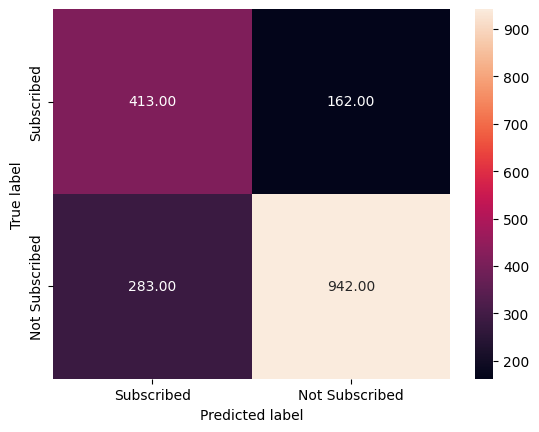

In [130]:
## Predicting on test set
pred_y = knn_clf.predict(test_X)
## Drawing the confusion matrix for KNN model
draw_cm( test_y, pred_y )

In [131]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1225
           1       0.59      0.72      0.65       575

    accuracy                           0.75      1800
   macro avg       0.72      0.74      0.73      1800
weighted avg       0.77      0.75      0.76      1800



#### 6.5.3.2 GridSerach for most optimal parameters

In [132]:
## Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

## Creating a dictionary with hyperparameters and possible values for searching
tuned_parameters = [{'n_neighbors': range(5,10),
                     'metric': ['canberra', 'euclidean', 'minkowski']}]

## Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')
## fit the search with training set
clf.fit(train_X, train_y )

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [133]:
clf.best_score_

np.float64(0.836246922936153)

In [134]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

In [135]:
clf.cv_results_

{'mean_fit_time': array([0.00398018, 0.00366774, 0.00371232, 0.0038867 , 0.00509975,
        0.00921328, 0.00762267, 0.00492444, 0.00477836, 0.00498321,
        0.00483212, 0.00495164, 0.00502   , 0.00505412, 0.00497963]),
 'std_fit_time': array([5.68885959e-04, 7.44555075e-05, 1.28508773e-04, 5.94076382e-04,
        4.79301634e-04, 2.78936221e-03, 2.62761547e-03, 3.01832652e-04,
        1.67695177e-04, 3.92421619e-04, 1.62789587e-04, 2.75862990e-04,
        3.83355638e-04, 4.07283059e-04, 3.04250907e-04]),
 'mean_score_time': array([0.07709341, 0.07675252, 0.07526069, 0.08311653, 0.11719356,
        0.07199128, 0.06347616, 0.03899517, 0.04069216, 0.0388607 ,
        0.03814545, 0.04053519, 0.03849936, 0.04080434, 0.03946698]),
 'std_score_time': array([0.00368862, 0.00411938, 0.00135853, 0.01469329, 0.00307275,
        0.01290328, 0.01539515, 0.00262756, 0.00923745, 0.00133362,
        0.00176268, 0.00393986, 0.00111063, 0.00692886, 0.00159274]),
 'param_metric': masked_array(data=['c

### 6.5.4 Ensemble Methods

### 6.5.5 Random Forest

#### 6.5.5.1 Buiding Random Forest Model

In [136]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

## Initializing the Random Forest Classifier with max_dept and n_estimators
radm_clf = RandomForestClassifier( max_depth=10, n_estimators=10)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=10, n_estimators=10)

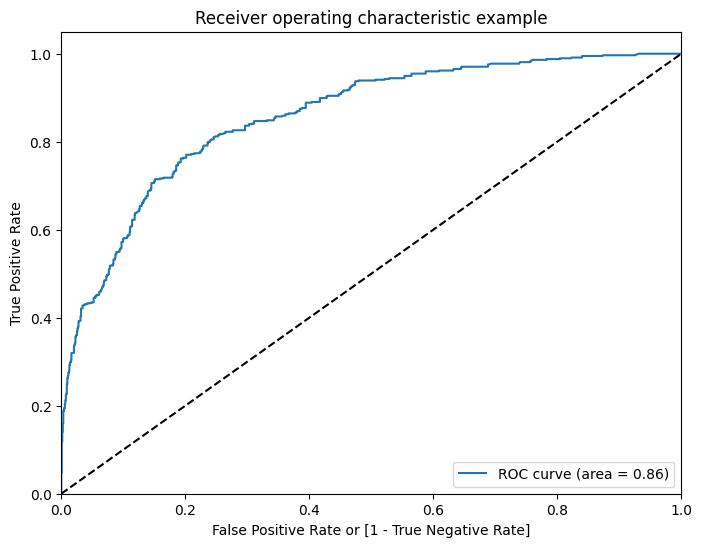

In [137]:
_, _, _, _ = draw_roc_curve( radm_clf, test_X, test_y );

#### 6.5.5.2 Grid Search for Optimal Parameters

In [138]:
## Configuring parameters and values for searched
tuned_parameters = [{'max_depth': [10, 15],
                   'n_estimators': [10,20],
                   'max_features': ['sqrt', 'auto']}]

## Initializing the RF classifier
radm_clf = RandomForestClassifier()

## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
                 tuned_parameters,
                 cv=5,
                 scoring='roc_auc')

## Fitting the training set
clf.fit(train_X, train_y )

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15],
                          'max_features': ['sqrt', 'auto'],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [139]:
clf.best_score_

np.float64(0.9371487276750434)

In [140]:
clf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 20}

#### 6.5.5.3 Building the final model with optimal parameter values

In [141]:
import math

In [142]:
## Initializing the Random Forest Mode with the optimal values
radm_clf = RandomForestClassifier( max_depth=15, n_estimators=20, max_features = 'sqrt')
## Fitting the model with the training set
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=15, n_estimators=20)

#### 6.5.5.4 ROC AUC Score

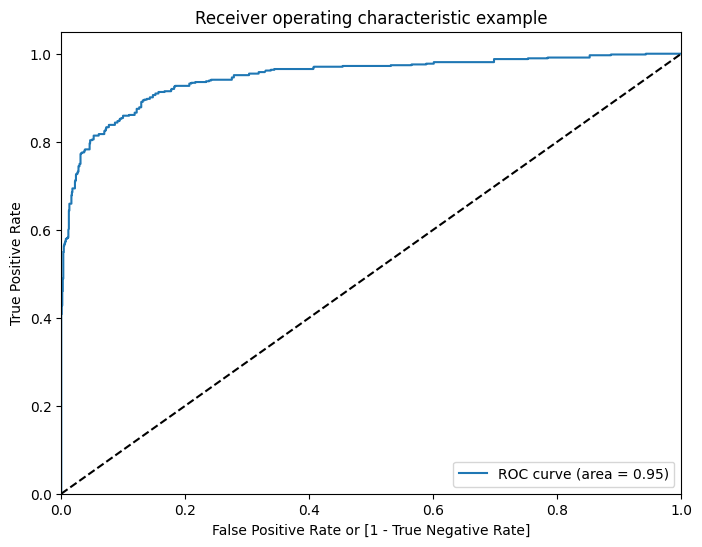

In [143]:
_, _, _, _ = draw_roc_curve( clf, test_X, test_y )

#### 6.5.5.5 Drawing the confusion matrix

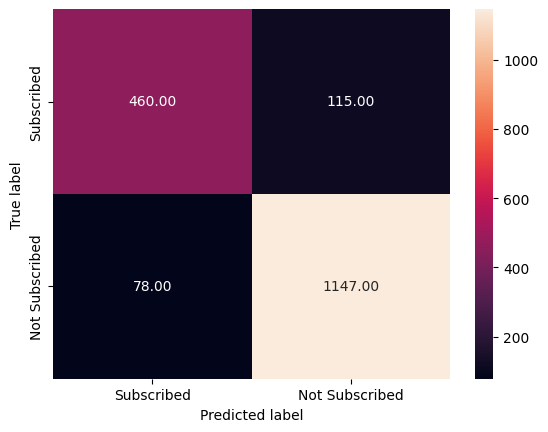

In [144]:
pred_y = radm_clf.predict( test_X )
draw_cm( test_y, pred_y )

In [145]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1225
           1       0.86      0.80      0.83       575

    accuracy                           0.89      1800
   macro avg       0.88      0.87      0.87      1800
weighted avg       0.89      0.89      0.89      1800



####  6.5.5.6 Finding important features

In [146]:
train_X.columns

Index(['age', 'balance', 'current-campaign', 'previous-campaign',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes',
       'housing-loan_yes', 'personal-loan_yes'],
      dtype='object')

In [147]:
radm_clf.feature_importances_

array([0.2072088 , 0.27027429, 0.09463862, 0.11507669, 0.01987584,
       0.01204185, 0.00745003, 0.01346259, 0.01958406, 0.00882811,
       0.01245597, 0.00905581, 0.01549834, 0.00724745, 0.0058929 ,
       0.02940628, 0.02412161, 0.02614954, 0.02002169, 0.01124586,
       0.00489674, 0.04076525, 0.02480168])

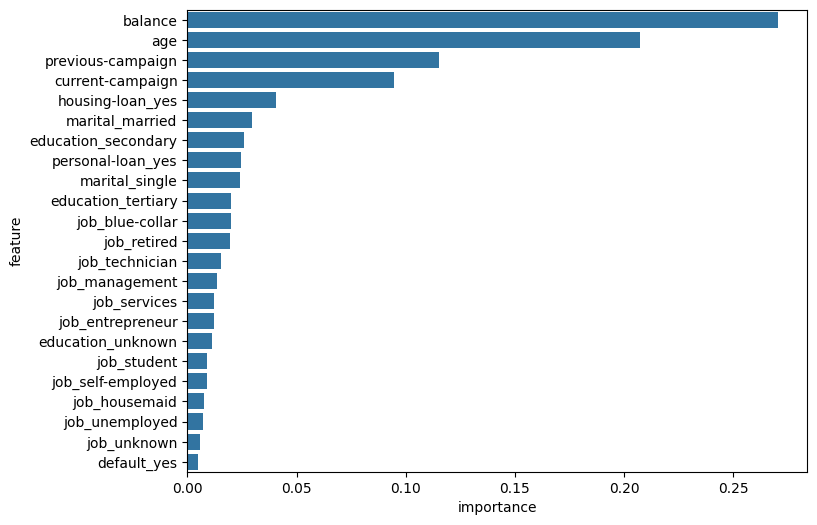

In [148]:
import numpy as np

# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns,
                               'importance': radm_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)

plt.figure(figsize=(8, 6))
# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

In [149]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
1,balance,0.270274,27.027429
0,age,0.207209,47.748309
3,previous-campaign,0.115077,59.255979
2,current-campaign,0.094639,68.719841
21,housing-loan_yes,0.040765,72.796365
15,marital_married,0.029406,75.736993
17,education_secondary,0.026150,78.351948
22,personal-loan_yes,0.024802,80.832116
16,marital_single,0.024122,83.244277
18,education_tertiary,0.020022,85.246446


### 6.5.6 Boosting

#### 6.5.6.1 Adaboost

In [150]:
## Importing Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

## Initializing logistic regression to use as base classifier
logreg_clf = LogisticRegression()

## Initilizing adaboost classifier with 50 classifers
ada_clf = AdaBoostClassifier(logreg_clf, n_estimators=50)

## Fitting adaboost model to training set
ada_clf.fit(train_X, train_y )

AdaBoostClassifier(estimator=LogisticRegression())

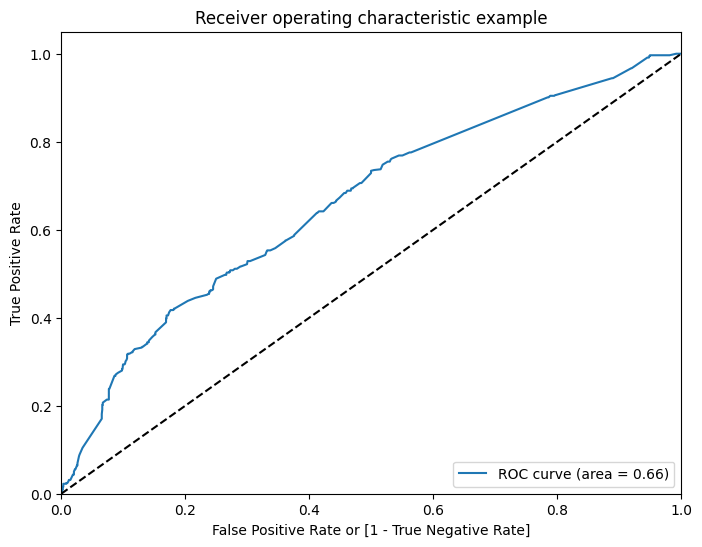

In [151]:
_, _, _, _ = draw_roc_curve( ada_clf, test_X, test_y )

#### 6.5.6.2 Gradient Boosting

In [152]:
## Importing Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

## Initializing Gradient Boosting with 500 estimators and max depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)

## Fitting gradient boosting model to training set
gboost_clf.fit(train_X, train_y )

GradientBoostingClassifier(max_depth=10, n_estimators=500)

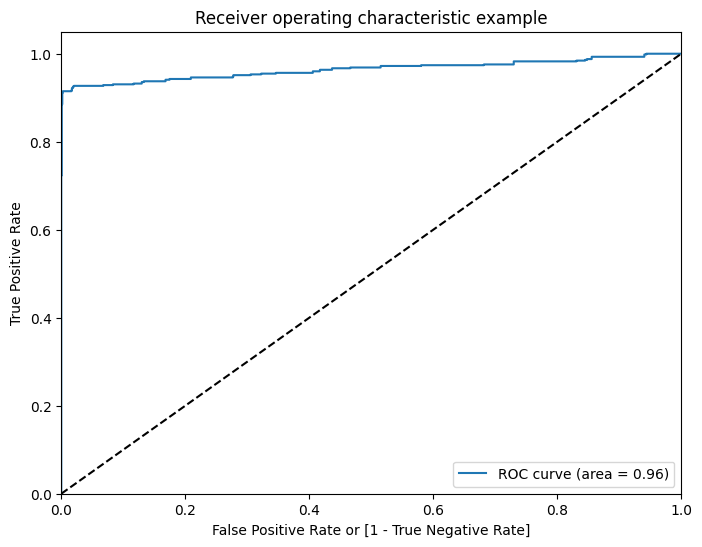

In [153]:
_, _, _, _ = draw_roc_curve( gboost_clf, test_X, test_y )

In [154]:
from sklearn.model_selection import cross_val_score

gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)
cv_scores = cross_val_score( gboost_clf, train_X, train_y, cv = 10, scoring = 'roc_auc' )

In [156]:
print( cv_scores )
print( "Mean Accuracy: ", np.mean(cv_scores), " with standard deviation of: ",  np.std(cv_scores))

[0.98140642 0.97618806 0.9812671  0.95954504 0.95924106 0.96415137
 0.94910505 0.97677413 0.95276565 0.98078816]
Mean Accuracy:  0.9681232042549552  with standard deviation of:  0.011896576693603013


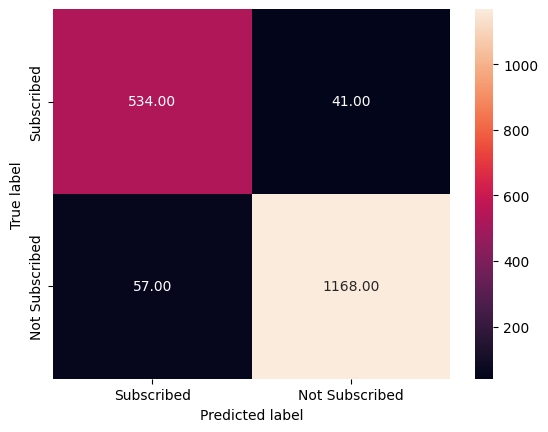

In [157]:
gboost_clf.fit(train_X, train_y )
pred_y = gboost_clf.predict( test_X )
draw_cm( test_y, pred_y )

In [158]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1225
           1       0.90      0.93      0.92       575

    accuracy                           0.95      1800
   macro avg       0.93      0.94      0.94      1800
weighted avg       0.95      0.95      0.95      1800



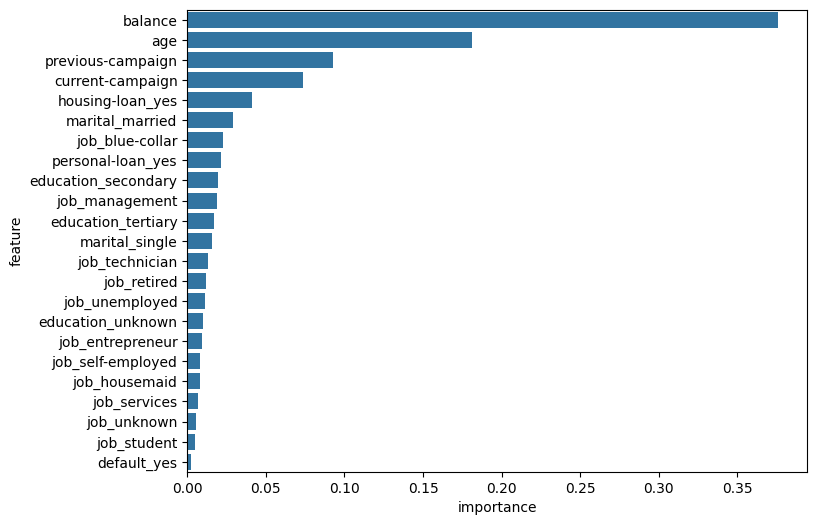

In [159]:
import numpy as np

# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns,
                               'importance': gboost_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)

plt.figure(figsize=(8, 6))
# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );